In [1]:
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
from tqdm import tqdm
from utils import*
from experiments import*
from networks import*

In [2]:
mat = scipy.io.loadmat('./binaryalphadigs.mat')
arrays_list = [ lire_alpha(mat['dat'],i) for i in range(10)]
test = np.concatenate(arrays_list, axis=0)
digits_test = torch.tensor(test).float()

In [3]:
# Create a DataLoader
train_dataset,test_dataset = load_mnist(None) # first we load 2000 random digits for the training
train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True,num_workers=8,pin_memory=True)
test_loader = DataLoader(test_dataset, batch_size=128, shuffle=False,num_workers=8,pin_memory=True)

In [4]:
device =  torch.device('cuda')
pretraining_args = Args(
     n_steps = 100,
     gibbs = 1,
     alpha = 1e-1,
     data = digits_test,
     mode =  'full'  ,
     batch_size = 64,
)
training_args = Args(
     lr = 1e-4,
     n_epochs = 50,
     train_loader = train_loader,
     test_loader = test_loader,
     device = device
    )
num_classes = 10
input_size = test.shape[1]
history = {"accuracy":[], "pretrained_accuracy":[]}

In [5]:
for i,n_layers in enumerate(range(2,11)):
    hidden_sizes = [200 for _ in range(n_layers)]
    print("\nConfig {}".format(i+1))
    model,pretrain_model = get_config(input_size=input_size,
                                        num_classes=num_classes,
                                        layer_config=hidden_sizes,
                                     device=device)
    accuracy,pretrain_accuracy = run_experiment(model=model,
                                            pretrain_model=pretrain_model,
                                            training=training_args,
                                            pretraining=pretraining_args)
    history['accuracy'].append(accuracy)
    history['pretrained_accuracy'].append(pretrain_accuracy)


Config 1
[INFO] training model 1 from scratch


100%|██████████| 50/50 [03:51<00:00,  4.63s/it]


[INFO] Pretraining  model 2 


100%|██████████| 2/2 [00:59<00:00, 29.72s/it]


[INFO] training model 2


100%|██████████| 50/50 [03:58<00:00,  4.78s/it]

[INFO] Evaluating models 



Config 2
[INFO] training model 1 from scratch


100%|██████████| 50/50 [04:08<00:00,  4.97s/it]


[INFO] Pretraining  model 2 


100%|██████████| 3/3 [01:33<00:00, 31.26s/it]


[INFO] training model 2


100%|██████████| 50/50 [03:56<00:00,  4.73s/it]

[INFO] Evaluating models 



Config 3
[INFO] training model 1 from scratch


100%|██████████| 50/50 [04:08<00:00,  4.98s/it]


[INFO] Pretraining  model 2 


100%|██████████| 4/4 [02:01<00:00, 30.41s/it]


[INFO] training model 2


100%|██████████| 50/50 [04:18<00:00,  5.16s/it]

[INFO] Evaluating models 



Config 4
[INFO] training model 1 from scratch


100%|██████████| 50/50 [04:25<00:00,  5.32s/it]


[INFO] Pretraining  model 2 


100%|██████████| 5/5 [02:35<00:00, 31.05s/it]


[INFO] training model 2


100%|██████████| 50/50 [04:23<00:00,  5.26s/it]

[INFO] Evaluating models 



Config 5
[INFO] training model 1 from scratch


100%|██████████| 50/50 [04:31<00:00,  5.43s/it]


[INFO] Pretraining  model 2 


100%|██████████| 6/6 [03:06<00:00, 31.01s/it]


[INFO] training model 2


100%|██████████| 50/50 [04:28<00:00,  5.37s/it]

[INFO] Evaluating models 



Config 6
[INFO] training model 1 from scratch


100%|██████████| 50/50 [04:25<00:00,  5.32s/it]


[INFO] Pretraining  model 2 


100%|██████████| 7/7 [03:33<00:00, 30.45s/it]


[INFO] training model 2


100%|██████████| 50/50 [04:38<00:00,  5.58s/it]

[INFO] Evaluating models 



Config 7
[INFO] training model 1 from scratch


100%|██████████| 50/50 [04:35<00:00,  5.52s/it]


[INFO] Pretraining  model 2 


100%|██████████| 8/8 [04:07<00:00, 30.97s/it]


[INFO] training model 2


100%|██████████| 50/50 [04:48<00:00,  5.77s/it]

[INFO] Evaluating models 



Config 8
[INFO] training model 1 from scratch


100%|██████████| 50/50 [05:04<00:00,  6.08s/it]


[INFO] Pretraining  model 2 


100%|██████████| 9/9 [04:37<00:00, 30.86s/it]


[INFO] training model 2


100%|██████████| 50/50 [05:01<00:00,  6.03s/it]

[INFO] Evaluating models 



Config 9
[INFO] training model 1 from scratch


100%|██████████| 50/50 [05:13<00:00,  6.26s/it]


[INFO] Pretraining  model 2 


100%|██████████| 10/10 [05:06<00:00, 30.67s/it]


[INFO] training model 2


100%|██████████| 50/50 [05:12<00:00,  6.25s/it]

[INFO] Evaluating models 


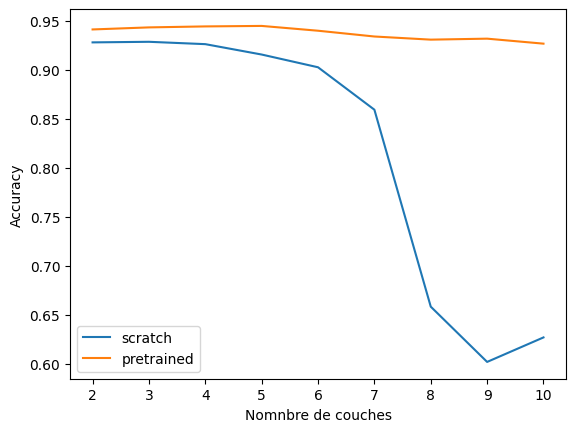

In [6]:
plt.plot(range(2,11),history['accuracy'],label="scratch")
plt.plot(range(2,11),history['pretrained_accuracy'],label="pretrained")
plt.xlabel('Nomnbre de couches')
plt.ylabel('Accuracy')
plt.legend()